# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bista* \
https://keras.io/api/

<b> Classification d'images de fruits </b> : *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

In [38]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [39]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"
# sys.path.insert(1, "./Image-classification/scripts/")
# sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) (2)
from LoadData import load_data
from PlotTrainingAnalysis import plot_training_analysis
from BasicConvolutionalNetwork import BasicConvolutionalNetwork

<b> Stockage des fichiers au sein de tenseurs </b>

In [40]:
#labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']
labels = ['oranges', 'pineapples', 'tomatoes']

x_train, y_train = load_data(path, labels)
x_val, y_val = load_data(path, labels, _dataset='validation')
x_test, y_test = load_data(path, labels, _dataset='test')

x_train /= 255
x_val /= 255
x_test /= 255

x_train.shape = (1069, 64, 64, 3)
y_train.shape = (1069, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:31
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:13 ETA:   0:01:16
100% (10 of 10) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


x_validation.shape = (145, 64, 64, 3)
y_validation.shape = (145, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:01 ETA:   0:00:04
100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


x_test.shape = (155, 64, 64, 3)
y_test.shape = (155, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:02
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

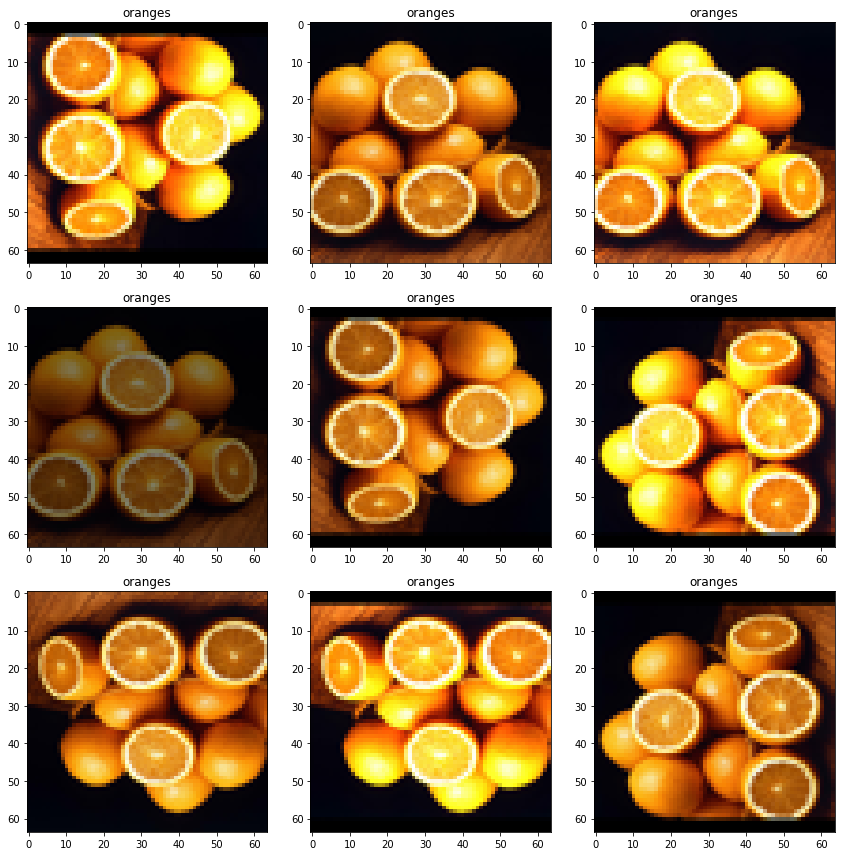

In [41]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(x_train[shuffle_indices[i]])

plt.tight_layout()
plt.show()

<b>Création d'un modèle et lancement de l'entraînement</b>

In [42]:
IMAGE_SIZE = 64
METRICS = 'sparse_categorical_accuracy'

# Notre modèle sera celui du TP03, mais adapté à une base de données multiclasses.
model = BasicConvolutionalNetwork(len(labels), IMAGE_SIZE)
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=[METRICS])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=10)

Model: "basic_convolutional_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           multiple                  896       
                                                                 
 conv2d_5 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_6 (Conv2D)           multiple                  54238     
                                                                 
 conv2d_7 (Conv2D)           multiple                  108416    
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

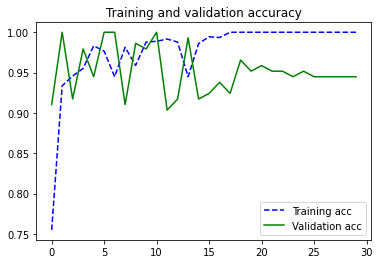

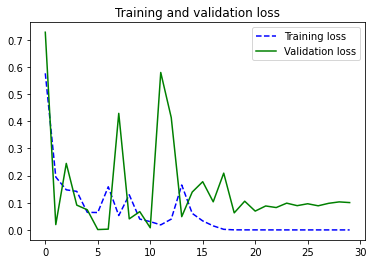

In [43]:
plot_training_analysis(history, METRICS)